In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/Users/Anusuya/Downloads/Final_Test_DataSet.csv")
tst=pd.read_csv("/Users/Anusuya/Downloads/Final_Test_DataSet.csv")

In [170]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:>

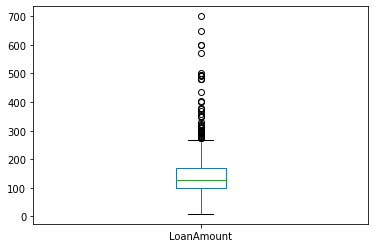

In [171]:
#checking outliers
df["LoanAmount"].plot.box()

In [172]:
#mean is affected by outliers
#so we make a copy, remove possible outliers and take its mean
tst=tst[(tst["LoanAmount"]<280) | (tst["LoanAmount"]>42)]
y=tst["LoanAmount"].mean()

In [173]:
tst=tst[(tst["Loan_Amount_Term"]<360) | (tst["Loan_Amount_Term"]>400)]
z=tst["Loan_Amount_Term"].mean()

In [174]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [175]:
#filling numerical missing values that affects result
df["LoanAmount"].fillna(y,inplace=True)
df["Loan_Amount_Term"].fillna(z,inplace=True)
df["Credit_History"].fillna((df["Credit_History"].median()),inplace=True)

In [176]:
#filling categorical missing values
#doesn't affect result
df["Gender"].fillna((df["Gender"].mode()[0]),inplace=True)
df["Married"].fillna((df["Married"].mode()[0]),inplace=True)
#affects result
df["Dependents"].fillna((df["Dependents"].mode()[0]),inplace=True)
df["Self_Employed"].fillna((df["Self_Employed"].mode()[0]),inplace=True)

In [177]:
#store for later
sv=df["Loan_ID"]

In [178]:
#drop unnecessary columns
df=df.drop(["Loan_ID"],axis=1)

In [203]:
print(sv)

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object


In [204]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,1,5849,0.0,146.412162,360.0,1.0,0,0
1,0,0,0,1,1,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,0,1,1,0,3000,0.0,66.000000,360.0,1.0,0,0
3,0,0,1,0,1,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,1,1,1,1,6000,0.0,141.000000,360.0,1.0,0,0


In [205]:
#change categorical/object data to numerical
df['Dependents']=pd.get_dummies(df['Dependents'])

In [206]:
df['Married']=pd.get_dummies(df['Married'])

In [207]:
df['Gender']=pd.get_dummies(df['Gender'])

In [208]:
df['Education']=pd.get_dummies(df['Education'])

In [209]:
df['Self_Employed']=pd.get_dummies(df['Self_Employed'])

In [210]:
df['Property_Area']=pd.get_dummies(df['Property_Area'])

In [211]:
df['Loan_Status']=pd.get_dummies(df['Loan_Status'])

In [212]:
df.dtypes

Gender                 uint8
Married                uint8
Dependents             uint8
Education              uint8
Self_Employed          uint8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          uint8
Loan_Status            uint8
dtype: object

In [213]:
#train test splitting
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=101)

In [215]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=500)
logreg.fit(x,y)
pred=logreg.predict(x)

In [216]:
print(pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [217]:
logreg.score(x,y)

0.8110749185667753

In [218]:
logreg.score(x_test,y_test)

0.7857142857142857

In [219]:
logreg.score(x_train,y_train)

0.8195652173913044

In [220]:
print(sv)

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object


In [221]:
out=pd.DataFrame(data={"id":sv})

In [222]:
out.to_csv(path_or_buf="/Users/Anusuya/Downloads/Submission1.csv",index=False,quoting=3)

In [223]:
ip=pd.DataFrame(data={"id":sv,"target":pred})

In [224]:
ip.to_csv(path_or_buf="/Users/Anusuya/Downloads/Submission1.csv",index=False,quoting=3)

In [225]:
ds=pd.read_csv("/Users/Anusuya/Downloads/Submission1.csv")

ds.dropna(axis=0, how='all',inplace=True)
ds.to_csv("/Users/Anusuya/Downloads/Submission1.csv", index=False)

nan_value = float("NaN")
ds.replace("", nan_value, inplace=True)
  
ds.dropna(how='all', axis=1, inplace=True)
ds.to_csv("/Users/Anusuya/Downloads/Submission1.csv", index=False)

In [226]:
ds['target'].replace(0, 'No',inplace=True)
ds['target'].replace(1, 'Yes',inplace=True)
ds.to_csv("/Users/Anusuya/Downloads/Submission1.csv", index=False)